In [1]:
#plantilla

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
datos=np.loadtxt('/Users/usuario-mac/Desktop/CLASES/programacion/2020-2/9clase/Datos_Peso.dat')
#print(datos)

In [9]:
#puedo acceder a columnas particulares

peso=datos[:,0]
altura=datos[:,1]
genero=np.int_(datos[:,2])
edad=np.int_(datos[:,3])

#print(genero)
print(np.mean(peso),np.std(peso))
print(np.mean(altura),np.std(altura))
print(np.mean(edad),np.std(edad))

60.509239130434786 15.906345174564203
1.6046739130434782 0.15172881334055036
31.63586956521739 15.94123093769969


In [13]:
mujeres0= genero==0
hombres0= genero==1

mujeres=genero[mujeres0]
hombres=genero[hombres0]

print(len(mujeres),len(hombres))

111 73


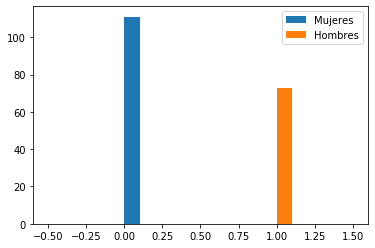

In [17]:
plt.hist(mujeres,label='Mujeres')
plt.hist(hombres,label='Hombres')
plt.legend()
plt.savefig('histo1.png')

In [20]:
#clasificar niños de adultos ya que el IMC para niños-adolecentes es diferente al de los adultos
#niños-adolecentes=2-19 años

ninos0=edad<=19 #definicion niños
adultos0=edad>19 #definicion adultos

ninos=edad[ninos0]
adultos=edad[adultos0]

print(len(ninos),len(adultos))

56 128


In [25]:
#discriminar entre hombres, mujeres, niños, niñas

ninas0=(edad<=19) & (genero==0)
ninas=ninas0[ninas0]


ninosH0=(edad<=19) & (genero==1)
ninosH=ninosH0[ninosH0]
print(len(ninosH),len(ninas))

mujerA0=(edad>19) & (genero==0)
mujerA=mujerA0[mujerA0]


hombreA0=(edad>19) & (genero==1)
hombreA=hombreA0[hombreA0]

print(len(hombreA),len(mujerA))


18 38
55 73


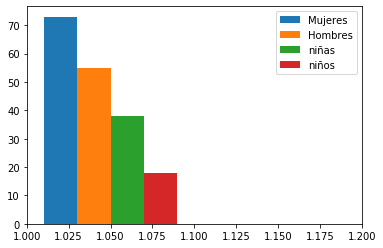

In [30]:
plt.hist([mujerA,hombreA,ninas,ninosH],label=['Mujeres','Hombres','niñas','niños'])
plt.legend()
plt.xlim(1.0,1.2)
plt.savefig('histo2.png')

In [35]:
#Hombres
#peso: peso=datos[:,0]
#altura=datos[:,1]
#hombreA0=(edad>19) & (genero==1) Hombre adulto

pesoH=peso[hombreA0]
alturaH=altura[hombreA0]
edadH=edad[hombreA0]

print(len(pesoH))
print(np.mean(pesoH),np.std(pesoH))
print(np.mean(alturaH),np.std(alturaH))
print(np.mean(edadH),np.std(edadH))

55
72.81818181818181 10.465685764076651
1.7116363636363636 0.06372565164583217
36.654545454545456 12.396800440316236


In [36]:
#mujeres
#mujerA0=(edad>19) & (genero==0) mujer adulta

pesoM=peso[mujerA0]
alturaM=altura[mujerA0]
edadM=edad[mujerA0]

print(len(pesoM))
print(np.mean(pesoM),np.std(pesoM))
print(np.mean(alturaM),np.std(alturaM))
print(np.mean(edadM),np.std(edadM))


73
59.92739726027397 9.495857211681841
1.5857534246575342 0.06529003381580514
40.43835616438356 14.28380278340956


In [44]:
#IMC para Hombres

IMCH=pesoH/(alturaH)**2

#clasificación

#Desnutricion
desnutricionH= (IMCH< 20)
#print(len(IMCH[desnutricionH]))
print('ojo, adulto en desnutrición', len(IMCH[desnutricionH]),edadH[desnutricionH])

#Normal
normalH= (IMCH>=20) & (IMCH<=24.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCH[normalH]))

#Sobre Peso
sobreP=(IMCH>=25) & (IMCH<=29.9)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCH[sobreP]))

#obesidad
obesidad=(IMCH>=30) & (IMCH<=40)
print('ojo, Obesidad', len(IMCH[obesidad]))

#Obesidad Grave
obesidad_G=(IMCH>40)
print('ojo, Obesidad Grave', len(IMCH[obesidad_G]))

ojo, adulto en desnutrición 3 [23 23 21]
Felicitaciones, buenos habitos de nutricion 26
ojo, sobre peso detectado, hay que cuidarse 21
ojo, Obesidad 3
ojo, Obesidad Grave 0


In [46]:
#IMC para Mujeres

IMCM=pesoM/(alturaM)**2

#clasificacion
#Desnutricion
desnutricionM= (IMCM< 19)
print('ojo, adulto Mujer en desnutrición', len(IMCM[desnutricionM]),edadM[desnutricionM])

#Normal
normalM= (IMCM>=19) & (IMCM<=23.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCM[normalM]))

#sobre peso
sobreP_M=(IMCM>=24) & (IMCM<=27)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCM[sobreP_M]))

#obesidad
obesidadM=(IMCM>=27) & (IMCM<=32)
print('ojo, Obesidad', len(IMCM[obesidadM]))

#obesidad Grave
obesidad_GM=(IMCM>32)
print('ojo, Obesidad Grave', len(IMCM[obesidad_GM]))


ojo, adulto Mujer en desnutrición 5 [21 75 24 20 20]
Felicitaciones, buenos habitos de nutricion 37
ojo, sobre peso detectado, hay que cuidarse 18
ojo, Obesidad 10
ojo, Obesidad Grave 3


Text(0, 0.5, 'IMC de Mujeres')

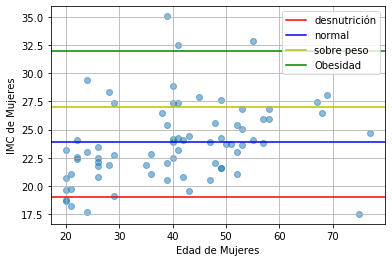

In [67]:
#edad mujers vs IMCM

plt.scatter(edadM,IMCM,marker='o',alpha=0.5)
plt.grid()
plt.axhline(y=19,color='r',linestyle='-',label='desnutrición')
plt.axhline(y=23.9,color='b', linestyle='-',label='normal')
plt.axhline(y=27, color='y', linestyle='-',label='sobre peso')
plt.axhline(y=32, color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('Edad de Mujeres')
plt.ylabel('IMC de Mujeres')

Text(0, 0.5, 'IMC de Hombres')

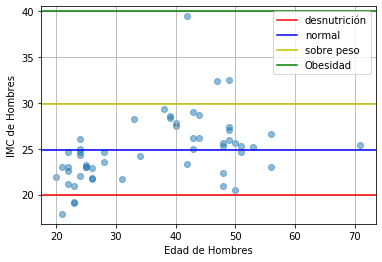

In [70]:
#edad Hombres vs IMCh

plt.scatter(edadH,IMCH,alpha=0.5)
plt.grid()
plt.axhline(y=20, color='r', linestyle='-',label='desnutrición')
plt.axhline(y=24.9, color='b', linestyle='-',label='normal')
plt.axhline(y=29.9, color='y', linestyle='-',label='sobre peso')
plt.axhline(y=40, color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('Edad de Hombres')
plt.ylabel('IMC de Hombres')

Text(0.5, 0, 'Edad de Mujeres')

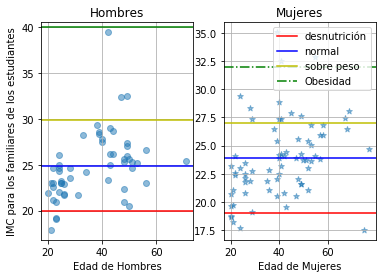

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(edadH,IMCH,alpha=0.5) #Hombres
ax1.grid()
ax1.axhline(y=20, color='r', linestyle='-')
ax1.axhline(y=24.9, color='b', linestyle='-')
ax1.axhline(y=29.9, color='y', linestyle='-')
ax1.axhline(y=40, color='g', linestyle='-')
ax1.set_title('Hombres')
ax1.set_xlabel('Edad de Hombres')
ax1.set_ylabel('IMC para los familiares de los estudiantes')


#edad mujers vs IMCM

ax2.scatter(edadM,IMCM,marker='*',alpha=0.5)
ax2.grid()
ax2.axhline(y=19,color='r',linestyle='-',label='desnutrición')
ax2.axhline(y=23.9,color='b', linestyle='-',label='normal')
ax2.axhline(y=27, color='y', linestyle='-',label='sobre peso')
ax2.axhline(y=32, color='g', linestyle='-.',label='Obesidad')
ax2.legend()
ax2.set_title('Mujeres')
ax2.set_xlabel('Edad de Mujeres')
#ax2.set_ylabel('IMC de Mujeres')
